In [3]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

In [5]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [6]:


dataset = tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 0 0 0 0 1 2 1 1 0 1 0 0 1 0 1 2 1 1 0 0 0 1 1 0 1 0 0]


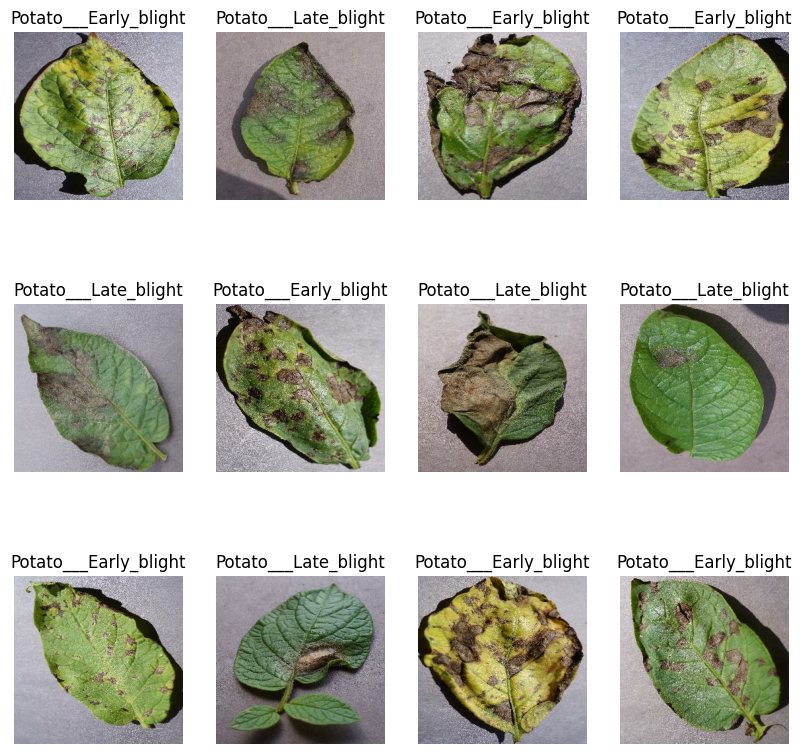

In [10]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
  for i in range(12):
     ax = plt.subplot(3, 4, i + 1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[labels_batch[i]])
     plt.axis("off")




In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):


  ds_size = len(ds)
  if shuffle:

      ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)


  return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [13]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:


resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])


In [15]:

data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [16]:
model_path = "my_model.h5"

In [17]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')

    ])

model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10
)

Epoch 1/10
54/54 [==============================] - 102s 2s/step - loss: 0.9113 - accuracy: 0.4548 - val_loss: 0.8492 - val_accuracy: 0.4792
Epoch 2/10
54/54 [==============================] - 91s 2s/step - loss: 0.7130 - accuracy: 0.6385 - val_loss: 0.4769 - val_accuracy: 0.8036
Epoch 3/10
54/54 [==============================] - 89s 2s/step - loss: 0.4007 - accuracy: 0.8212 - val_loss: 0.6168 - val_accuracy: 0.6198
Epoch 4/10
54/54 [==============================] - 88s 2s/step - loss: 0.3608 - accuracy: 0.8468 - val_loss: 0.3241 - val_accuracy: 0.8542
Epoch 5/10
54/54 [==============================] - 88s 2s/step - loss: 0.2815 - accuracy: 0.8903 - val_loss: 0.2177 - val_accuracy: 0.9115
Epoch 6/10
54/54 [==============================] - 90s 2s/step - loss: 0.2506 - accuracy: 0.8938 - val_loss: 0.4103 - val_accuracy: 0.8073
Epoch 7/10
54/54 [==============================] - 94s 2s/step - loss: 0.2060 - accuracy: 0.9114 - val_loss: 0.1995 - val_accuracy: 0.9115
Epoch 8/10
54/54 [=

In [21]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 4s 347ms/step - loss: 0.1537 - accuracy: 0.9297


In [22]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
history.history['accuracy']

[0.4548121988773346,
 0.6384976506233215,
 0.8211805820465088,
 0.8468309640884399,
 0.8902581930160522,
 0.8937793374061584,
 0.9113849997520447,
 0.9131455421447754,
 0.9471830725669861,
 0.9530516266822815]

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation Loss')

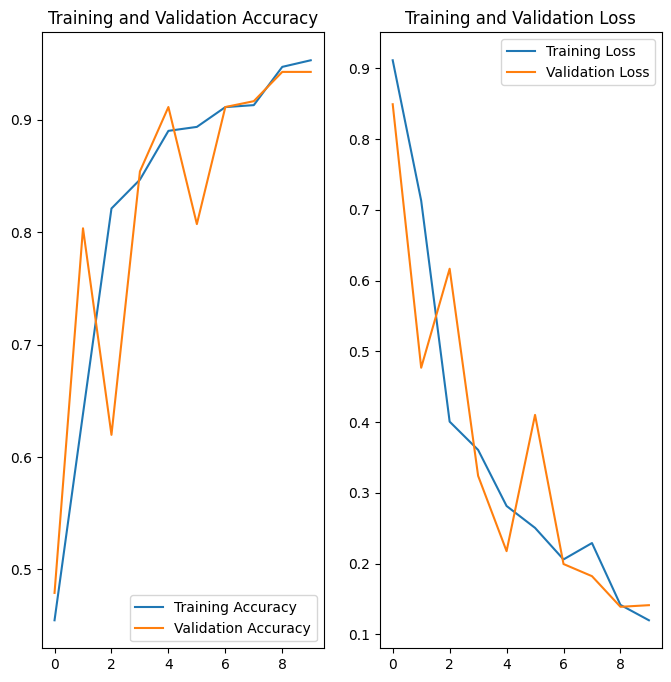

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc=('lower right'))
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc=('upper right'))
plt.title("Training and Validation Loss")



first image to predict
firstimage's actual label: Potato___Late_blight
1/1 [==============================] - 1s 908ms/step
predicted label: Potato___Late_blight


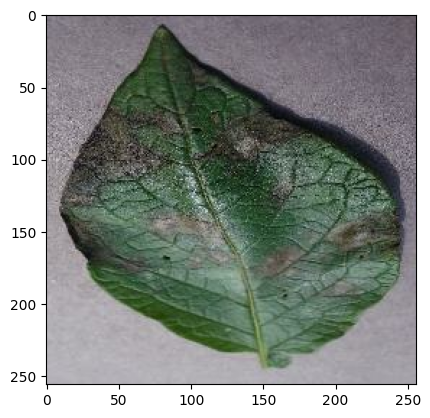

In [28]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("firstimage's actual label:",class_names[first_label])


    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [29]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #Craete a batch

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 67ms/step


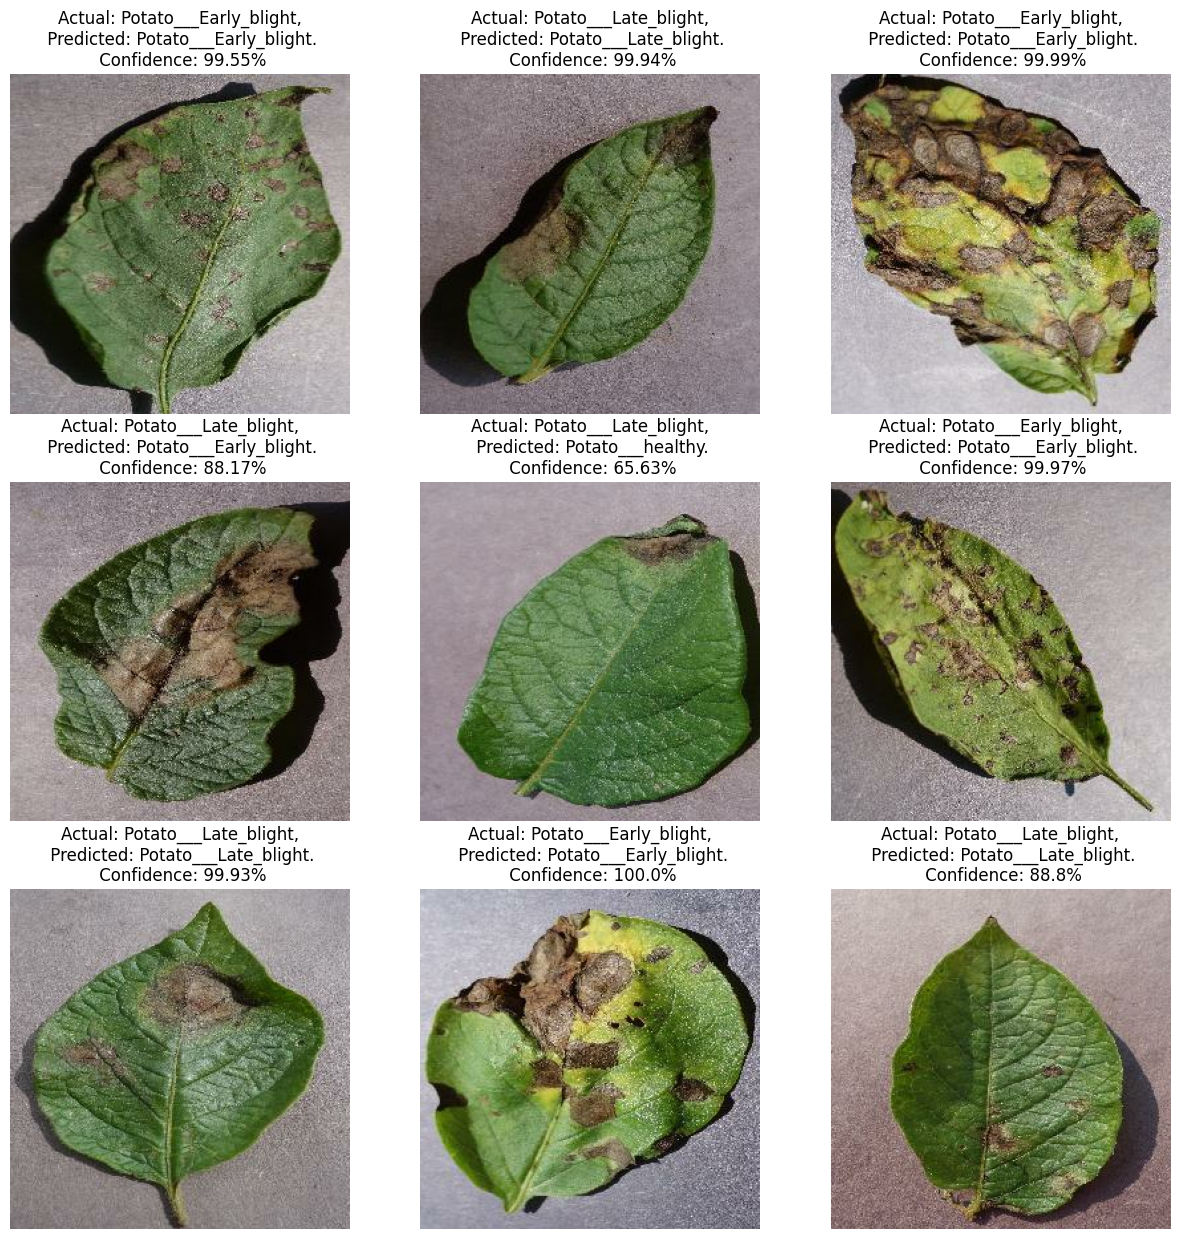

In [30]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for(i) in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
        

In [32]:
import os

model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)

# Safely determine next model version number
model_version = max([int(i) for i in os.listdir(model_dir) if i.isdigit()] + [0]) + 1

# Save model safely
model.save(f"{model_dir}/{model_version}")


INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
